# Understanding representations of ColourCheckers

[ColourChecker](https://en.wikipedia.org/wiki/ColorChecker)'s are typically a 24 patch of standard colours that can be added to a photograph to provide calibration data.  This is because they are set of 24 standard colours.  It is this use a standard reference of 24 colours that is useful as an entry point into other ranges of standard colours, eg Munsell or Pantone.

This presents at least three problems:

- standardisation
- representation
- software usage

## Problem of standardisation

The colour checker has gone through a number of variations since first released in a paper by McCamy, Marcus, and Davidson in the Journal of Applied Photographic Engineering.[3]

Illluminant changes the sRGB value of a swatch colour

The representation of a colour swatch depends on the illimuninant and this provides some of the divergence in values that one gets.  The first problem is the variation in the swatch colour.

Using the 1976 swatch and a D65 illuminant gives you the same results with purple represented as #5F3871.  This is the result you get with colour.XYZ_to_sRGB as calculated manually.


#  Can I use colour-science in JupyterLite
The import takes about 5 seconds so that is quite feasible.

In [1]:
%pip install -q colour-science

Try out section 3.20 colour plotting
This is a little different as pyiodide needs you to directly import matplotplib which is referenced in colour.plotting but doesn't import it by itself.

In this versions you can see I have installed https://www.colour-science.org/ which is what I am exploring to start with.

## Colour checker
The json data structures for a number of colour checkers are coded directly in colour-science.  There is also a function to display them on screen in traditional form.

I am hoping to be able to manipulate this data using a an object to represent a colour checker.
aims will be:
- Be able to plot it
- plot using names and different patterns
- plot in 3D so can see space
- plot in 3D with colour areas
- plot Delta spheres in 3D
- compare other patterns

## Start

There is a great diagram at the front of the manual that shows that XYZ colour space is really at the heart of the colour module and  most 
spaces are just transforms from this space.  You will see that as we start in one space move to XYZ and manipulate from there.

Colour has a one stop shop so that you can display something straight away:
This is taken from section 3.20.6 of the manual.

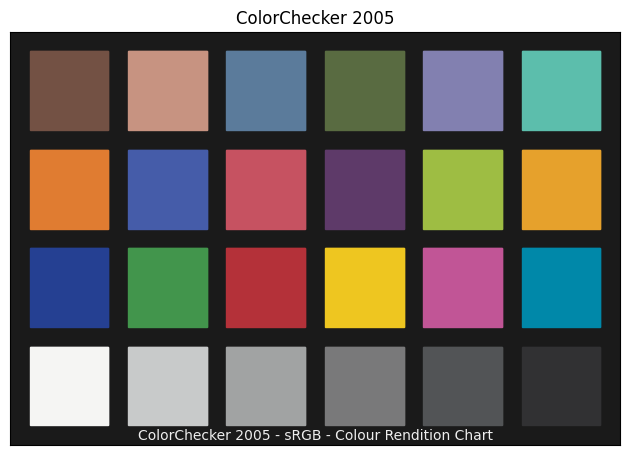

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'ColorChecker 2005'}>)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colour
import colour.plotting as cp 
cp.plot_single_colour_checker("ColorChecker 2005", text_kwargs={"visible": False} )

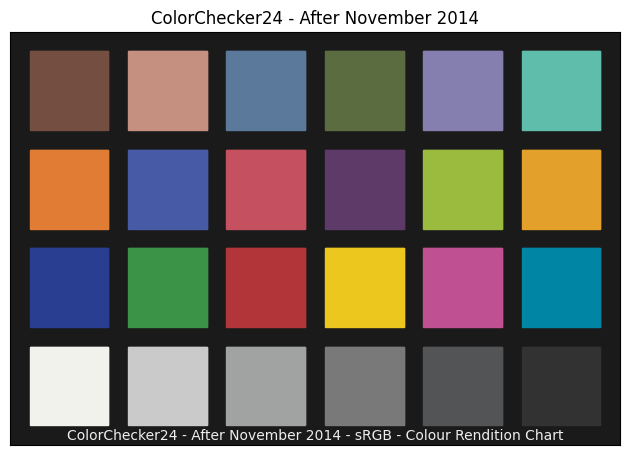

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'ColorChecker24 - After November 2014'}>)

In [7]:
cp.plot_single_colour_checker("ColorChecker24 - After November 2014", text_kwargs={"visible": False} )

The raw data for these plots comes from data [inside the module](https://github.com/colour-science/colour/blob/80a8f21b9c63b5d8e1223df75171abd36ee8a620/colour/characterisation/datasets/colour_checkers/chromaticity_coordinates.py) for example.
The chromaticity coordinates are in *CIE xyY* colourspace.

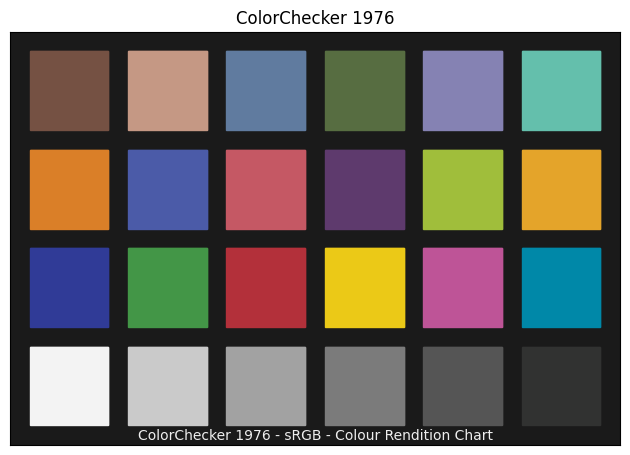

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'ColorChecker 1976'}>)

In [9]:
cp.plot_single_colour_checker("ColorChecker 1976", text_kwargs={"visible": False} )

In [10]:
cc = colour.characterisation.datasets.colour_checkers.CCS_COLOURCHECKERS
cc["ColorChecker 1976"]

ColourChecker(name='ColorChecker 1976', data={'dark skin': array([ 0.4002,  0.3504,  0.1005]), 'light skin': array([ 0.3773,  0.3446,  0.3582]), 'blue sky': array([ 0.247 ,  0.2514,  0.1933]), 'foliage': array([ 0.3372,  0.422 ,  0.1329]), 'blue flower': array([ 0.2651,  0.24  ,  0.2427]), 'bluish green': array([ 0.2608,  0.343 ,  0.4306]), 'orange': array([ 0.506 ,  0.407 ,  0.3005]), 'purplish blue': array([ 0.211,  0.175,  0.12 ]), 'moderate red': array([ 0.4533,  0.3058,  0.1977]), 'purple': array([ 0.2845,  0.202 ,  0.0656]), 'yellow green': array([ 0.38  ,  0.4887,  0.4429]), 'orange yellow': array([ 0.4729,  0.4375,  0.4306]), 'blue': array([ 0.1866,  0.1285,  0.0611]), 'green': array([ 0.3046,  0.4782,  0.2339]), 'red': array([ 0.5385,  0.3129,  0.12  ]), 'yellow': array([ 0.448 ,  0.4703,  0.591 ]), 'magenta': array([ 0.3635,  0.2325,  0.1977]), 'cyan': array([ 0.1958,  0.2519,  0.1977]), 'white 9.5 (.05 D)': array([ 0.3101,  0.3163,  0.9001]), 'neutral 8 (.23 D)': array([ 0.3

I have a a data colour checker which has a slightly different arrangement and 
I am trying to work out the colours and a ca 2005 Greta Macbeth mini color checker which has a calibration sheet which 
follows the original paper.


In [11]:
colour_versions = [k for k in colour.characterisation.datasets.colour_checkers.CCS_COLOURCHECKERS.keys()]
print(f"There are {len(colour_versions)} colour versions")
colour_versions

There are 9 colour versions


['ColorChecker 1976',
 'ColorChecker 2005',
 'BabelColor Average',
 'ColorChecker24 - Before November 2014',
 'ColorChecker24 - After November 2014',
 'babel_average',
 'cc2005',
 'ccb2014',
 'cca2014']

Each version has a name, data and an illuminant.  Looking at the source code you can see that:
some of them have the classic colour names SAMPLE_LABELS_COLORCHECKER_CLASSIC and some have variants.

Note the last 4 are just abreviations of the previous 4 so going to remove those.

In [12]:
colour_versions = colour_versions[:-4]

## All the colour names are the same

In [13]:
# Show headers are all the same
dfh = [list(cc[cv].data.keys()) for cv in colour_versions]
df = pd.DataFrame(dfh).transpose()
df.head(n=25)
# prove it
for i,name in enumerate(colour_versions):
    if i > 0:
        same = True
        for j, colour_name in enumerate(dfh[i]):
            if colour_name != dfh[0][j]:
                same = False
                print(f"For {name} have {colour_name} and {dfh[0][j]}")
        if same:
            print(f"{name} has same colour names as {colour_versions[0]}")
                             

ColorChecker 2005 has same colour names as ColorChecker 1976
BabelColor Average has same colour names as ColorChecker 1976
ColorChecker24 - Before November 2014 has same colour names as ColorChecker 1976
ColorChecker24 - After November 2014 has same colour names as ColorChecker 1976


# Get one data point and convert to different colour spaces
The data is xyY space.  However most of the conversion routines are in XYZ space



In [14]:
p = cc[colour_versions[0]].data["purple"]
print(f"In xyY space this is purple (p): {p}")
p1 = colour.xyY_to_XYZ(p)
print(f"In XYZ space this is purple (p1): {p1}")
p2 = colour.XYZ_to_xyY(p1)
print(f"back to xyY to see if anything lost (p2): {p2}")
p3 = colour.XYZ_to_Lab(p1)
print(f"to Lab (p3): {p3}")
p4 = colour.XYZ_to_sRGB(p1)
print(f"to sRGB default (p4): {p4}")
p5 = colour.XYZ_to_sRGB(p1, apply_cctf_encoding = False)
print(f"to sRGB no scaling (p5): {p5}")
p6 = colour.XYZ_to_Oklab(p1)
print(f"to Oklab (p6): {p6}")

from colour.models import RGB_COLOURSPACE_sRGB
illuminant = np.array([0.34570, 0.35850])
p7 = colour.XYZ_to_RGB(p1, RGB_COLOURSPACE_sRGB, illuminant, "Bradford")
print(f"to RGB (p7): {p7}")
# p7 = colour.XYZ_to_RGB(p1, )
# print(f"to sRGB num no scaling: {p7}")



In xyY space this is purple (p): [ 0.2845  0.202   0.0656]
In XYZ space this is purple (p1): [ 0.09239208  0.0656      0.1667604 ]
back to xyY to see if anything lost (p2): [ 0.2845  0.202   0.0656]
to Lab (p3): [ 30.78348847  28.24630135 -26.33722483]
to sRGB default (p4): [ 0.37407601  0.22221792  0.44676055]
to sRGB no scaling (p5): [ 0.11541872  0.04045435  0.16802958]
to Oklab (p6): [ 0.41496862  0.07052963 -0.07328786]


<class 'TypeError'>: float() argument must be a string or a real number, not 'RGB_Colourspace'

So far so good but I haven't got to RGB values
‘aces’: RGB_COLOURSPACE_ACES2065_1.name

‘adobe1998’: RGB_COLOURSPACE_ADOBE_RGB1998.name

‘prophoto’

In [15]:
%pip install "drawsvg~=2.0"
import drawsvg as draw

[  95.38938156   56.66557087  113.92394121]
#5F3871


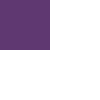

In [16]:
def rgb_to_hex(c):
    c1 = c*255
    print(c1)
    c2 = f"#{int(c1[0]):02X}{int(c1[1]):02X}{int(c1[2]):02X}"
    print(c2)
    return c2

def swatch(rgb_hex):
    d = draw.Drawing(100, 100, origin='center')
    # Draw a rectangle
    r = draw.Rectangle(-50, -50, 50, 50, fill=rgb_to_hex(rgb_hex))
    d.append(r)
    return d
    
swatch(p4)

So this RGB colour is not the same as any of the the first three (5e3a69,5d3a67,5e3a6d) when using a colour picker (note the last colour is the same as the colour picker).  They are all quite close (but not the same) and this is quite different.  However the SVG plotter does plot the right colour.

There is a walk through in the manual so will try with that.

## Convert to Display Colours

This comes from [the manual](https://colour.readthedocs.io/en/develop/tutorial.html)

CIE XYZ tristimulus values can be converted into sRGB colourspace RGB values in order to display them on screen:

In [17]:
# The output domain of *colour.sd_to_XYZ* is [0, 100] and the input
# domain of *colour.XYZ_to_sRGB* is [0, 1]. It needs to be accounted for,
# thus the input *CIE XYZ* tristimulus values are scaled.
RGB = colour.XYZ_to_sRGB(p1)
print(RGB, p4)

[ 0.37407601  0.22221792  0.44676055] [ 0.37407601  0.22221792  0.44676055]


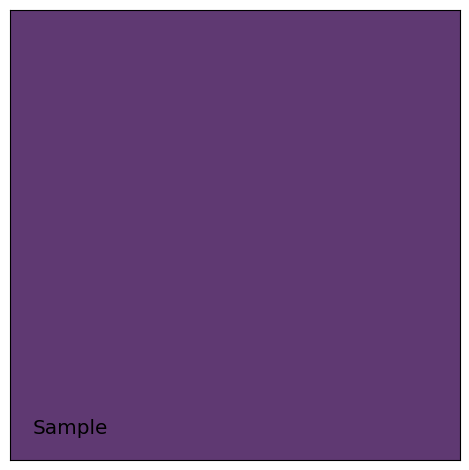

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [18]:
# Plotting the *sRGB* colourspace colour of the *Sample* spectral distribution.
colour.plotting.plot_single_colour_swatch(
    colour.plotting.ColourSwatch(RGB, "Sample"), text_kwargs={"size": "x-large"}
)

This puzzling as this colour although similar to the others is different again as 5F3972.  However the transform that I used early is identical.


# Testing code from google colab

In [19]:
import micropip
await micropip.install("networkx")
test = colour.convert(['#5e3a69', '#FFFFFF'], 'Hexadecimal', 'sRGB')
test

/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: The "Automatic Colour Conversion Graph" is a beta feature, be mindful of this when using it. Please report any unexpected behaviour and do not hesitate to ask any questions should they arise.
This warning can be disabled with the "colour.utilities.suppress_warnings" context manager as follows:
with colour.utilities.suppress_warnings(colour_usage_warnings=True): 
    convert(*args, **kwargs)
  warn(*args, **kwargs)


array([[ 0.36863115,  0.22745935,  0.41176615],
       [ 1.00000655,  1.00002376,  1.00000697]])

In [20]:
test[1]=p4

In [21]:
test

array([[ 0.36863115,  0.22745935,  0.41176615],
       [ 0.37407601,  0.22221792,  0.44676055]])

In [22]:
gradient = colour.algebra.lerp(
    test[0][np.newaxis],
    test[1][np.newaxis],
    np.linspace(0, 1, 20)[..., np.newaxis])

In [23]:
RGB = colour.convert(gradient, 'sRGB', 'Output-Referred RGB')

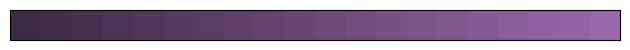

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [24]:
colour.plotting.plot_multi_colour_swatches(np.clip(RGB, 0, 1))

In [25]:
np.newaxis

/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: The "Automatic Colour Conversion Graph" is a beta feature, be mindful of this when using it. Please report any unexpected behaviour and do not hesitate to ask any questions should they arise.
This warning can be disabled with the "colour.utilities.suppress_warnings" context manager as follows:
with colour.utilities.suppress_warnings(colour_usage_warnings=True): 
    convert(*args, **kwargs)
  warn(*args, **kwargs)


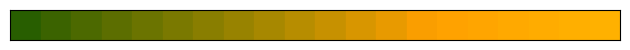

/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: The "Automatic Colour Conversion Graph" is a beta feature, be mindful of this when using it. Please report any unexpected behaviour and do not hesitate to ask any questions should they arise.
This warning can be disabled with the "colour.utilities.suppress_warnings" context manager as follows:
with colour.utilities.suppress_warnings(colour_usage_warnings=True): 
    convert(*args, **kwargs)
  warn(*args, **kwargs)
/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: "RGB" array contains negative values, those will be clipped, unpredictable results may occur!
  warn(*args, **kwargs)
/lib/python3.10/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: "RGB" array contains values over 1 and will be normalised, unpredictable results may occur!
  warn(*args, **kwargs)


['#183d00' '#254100' '#314500' '#3c4900' '#474d00' '#515100' '#5c5400'
 '#675800' '#725b00' '#7d5f00' '#886200' '#946500' '#a06800' '#ac6b00'
 '#b86e00' '#c67000' '#d37300' '#e17500' '#f07700' '#fe7900']


In [26]:
import colour
import numpy as np

CAM16UCS = colour.convert(['#ff0000', '#00ff00'], 'Hexadecimal', 'CAM16UCS')
gradient = colour.algebra.lerp(
    CAM16UCS[0][np.newaxis],
    CAM16UCS[1][np.newaxis],
    np.linspace(0, 1, 20)[..., np.newaxis])
RGB = colour.convert(gradient, 'CAM16UCS', 'Output-Referred RGB')

colour.plotting.plot_multi_colour_swatches(np.clip(RGB, 0, 1))

print(colour.convert(RGB, 'Output-Referred RGB', 'Hexadecimal'))

In [27]:
%pip install -q colormath

<class 'ValueError'>: Can't find a pure Python 3 wheel for 'colormath'.
See: https://pyodide.org/en/stable/usage/faq.html#micropip-can-t-find-a-pure-python-wheel
You can use `micropip.install(..., keep_going=True)`to get a list of all packages with missing wheels.

## One question is how different are all these.
We are looking at them mapped into sRGB space and I don't know how many are out of the gamut or how much the differences are, but I am going to find out.


In [10]:
print(sorted(colour.characterisation.CCS_COLOURCHECKERS.keys()))

['BabelColor Average', 'ColorChecker 1976', 'ColorChecker 2005', 'ColorChecker24 - After November 2014', 'ColorChecker24 - Before November 2014', 'babel_average', 'cc2005', 'cca2014', 'ccb2014']


In [28]:
XYZ = colour.xyY_to_XYZ(p)
XYZ

array([ 0.09239208,  0.0656    ,  0.1667604 ])

In [29]:
cc["ColorChecker 1976"].illuminant

array([ 0.31006,  0.31616])

In [30]:
RGB = colour.plotting.XYZ_to_plotting_colourspace(
    XYZ, 
    cc["ColorChecker 1976"].illuminant)
RGB

array([ 0.36986173,  0.22567758,  0.42912804])

In [31]:
RGB1 = colour.plotting.XYZ_to_plotting_colourspace(
    XYZ, 
    cc["ColorChecker 2005"].illuminant)
RGB1

array([ 0.35400858,  0.22613321,  0.51009754])

In [32]:
rgb_to_hex(RGB)

[  94.31474152   57.5477833   109.42764975]
#5E396D


'#5E396D'

In [33]:
colour.plotting.ColourSwatch(np.clip(np.ravel(RGB), 0, 1))

ColourSwatch(RGB=array([ 0.36986173,  0.22567758,  0.42912804]), name=None)

[  94.31474152   57.5477833   109.42764975]
#5E396D


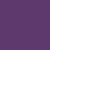

In [34]:
swatch(RGB)

[  90.27218912   57.66396944  130.07487233]
#5A3982


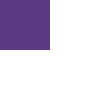

In [35]:
swatch(RGB1) # with a different illuminant

In [36]:
colour.plotting.colour_swatches.append(
                ColourSwatch(np.clip(np.ravel(RGB), 0, 1), label.title())
            )

<class 'AttributeError'>: module 'colour.plotting' has no attribute 'colour_swatches'

In [37]:
            RGB = XYZ_to_plotting_colourspace(XYZ, colour_checker.illuminant)
            colour_swatches.append(
                ColourSwatch(np.clip(np.ravel(RGB), 0, 1), label.title())
            )

<class 'NameError'>: name 'XYZ_to_plotting_colourspace' is not defined

In [38]:
colour_versions = [k for k in colour.characterisation.datasets.colour_checkers.CCS_COLOURCHECKERS.keys()]
print(f"There are {len(colour_versions)} colour versions")
colour_versions

There are 9 colour versions


['ColorChecker 1976',
 'ColorChecker 2005',
 'BabelColor Average',
 'ColorChecker24 - Before November 2014',
 'ColorChecker24 - After November 2014',
 'babel_average',
 'cc2005',
 'ccb2014',
 'cca2014']

In [39]:
[colour.characterisation.datasets.colour_checkers.CCS_COLOURCHECKERS[k].illuminant for k in colour.characterisation.datasets.colour_checkers.CCS_COLOURCHECKERS.keys()]

[array([ 0.31006,  0.31616]),
 array([ 0.34570291,  0.3585386 ]),
 array([ 0.34570291,  0.3585386 ]),
 array([ 0.34570291,  0.3585386 ]),
 array([ 0.34570291,  0.3585386 ]),
 array([ 0.34570291,  0.3585386 ]),
 array([ 0.34570291,  0.3585386 ]),
 array([ 0.34570291,  0.3585386 ]),
 array([ 0.34570291,  0.3585386 ])]

## Proof that colour.XYZ_to_sRGB is correct
Although the swatches given different results these are not sRGB.

I am not sure why they are different.

{\displaystyle {\begin{bmatrix}R_{\text{linear}}\\G_{\text{linear}}\\B_{\text{linear}}\end{bmatrix}}={\begin{bmatrix}+3.2406&-1.5372&-0.4986\\-0.9689&+1.8758&+0.0415\\+0.0557&-0.2040&+1.0570\end{bmatrix}}{\begin{bmatrix}X_{D65}\\Y_{D65}\\Z_{D65}\end{bmatrix}}}

In [40]:
sx = np.array([
    [+3.2406,-1.5372,-0.4986],
    [-0.9689,+1.8758,+0.0415],
    [+0.0557,-0.2040,+1.0570]])
sx*XYZ

array([[ 0.29940577, -0.10084032, -0.08314673],
       [-0.08951869,  0.12305248,  0.00692056],
       [ 0.00514624, -0.0133824 ,  0.17626574]])

In [41]:
XYZ

array([ 0.09239208,  0.0656    ,  0.1667604 ])

In [50]:
p8 = sx @ XYZ
p8

array([ 0.11541872,  0.04045435,  0.16802958])

In [43]:
XYZ

array([ 0.09239208,  0.0656    ,  0.1667604 ])

In [44]:
sx

array([[ 3.2406, -1.5372, -0.4986],
       [-0.9689,  1.8758,  0.0415],
       [ 0.0557, -0.204 ,  1.057 ]])

In [49]:
def gamma(l):
    if l <= 0.0031308:
        return 12.92 * l
    return (1.055* l ** (1/2.4))-0.055
# print(255*gamma(0.0031307),255*gamma(0.0031308),255*gamma(0.0031309))

10.31440422 10.31473368 10.315050333542494


In [52]:
ngamma = np.frompyfunc(gamma, 1, 1)

In [56]:
rgb_to_hex(ngamma(p8))

[95.38938155779472 56.665570868502535 113.92394120662887]
#5F3871


'#5F3871'

In [58]:
# = p4
rgb_to_hex(p4)

[  95.38938156   56.66557087  113.92394121]
#5F3871


'#5F3871'